## Decision Tree 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(X.shape, y.shape)

(569, 30) (569,)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2, stratify = y, random_state = 42)

In [4]:
model = DecisionTreeClassifier(random_state=21)

In [5]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [6]:
y_pred = model.predict(x_test)

In [7]:
y_pred.shape

(114,)

In [9]:
accuracy_score(y_test,y_pred)

0.9122807017543859

#### decisionTree for regression

#### Applying cross validation on Training Set
examining the model complexity overfitting and bias tradeoff



In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [3]:
# dataset load
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [5]:
model = DecisionTreeRegressor(max_depth= 6, min_samples_leaf=0.2, random_state=42)

In [6]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.2, random_state=42)

In [7]:
y_pred = model.predict(x_test)

In [8]:
mse = MSE(y_test, y_pred)

In [9]:
mse

40.18988951559186

In [32]:
rmse = mse **(1/2)

In [33]:
rmse

6.339549630343772

In [28]:
# apppling cross validataion
cv  = -cross_val_score(model,x_train,y_train, cv= 10, scoring='neg_mean_squared_error', n_jobs=-1)
# cross_val_score does not calc mean_squared_error directly
# n_jobs for allocating the amount of cpu

In [29]:
cv

array([23.20698033, 54.43212192, 38.26185703, 39.29079452, 54.10933692,
       56.73556441, 47.73084701, 34.90184439, 28.93382302, 60.41242352])

In [34]:
# mean of mse cv
print("{:.2f}".format(cv.mean()**(1/2)))

6.62


In [35]:
MSE(y_train, model.predict(x_train))**(1/2)


6.123202937549451

In [36]:
# since the test error > training error model overfits the data

### Ensemble Learning

In [1]:
# importing diff classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier 
# importing VottingClassifier as meta model
from sklearn.ensemble import VotingClassifier
# importing datasets
from sklearn.datasets import load_breast_cancer
# split
from sklearn.model_selection import train_test_split
# score
from sklearn.metrics import accuracy_score

In [6]:
# setting the seed value
SEED = 42
# loading data 
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [7]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = SEED)

In [8]:
# model creation
lr = LogisticRegression(random_state=SEED)
knn = KNN()
tree = DecisionTreeClassifier(random_state= SEED)

In [9]:
# looping over each model
cls = [('Logistic Regreesion', lr), ('k neighbors', knn), ('tree', tree)]
for cls_name, model in cls:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("{} test accuracy {:.3f}".format(cls_name, accuracy_score(y_test,y_pred)))

Logistic Regreesion test accuracy 0.971
k neighbors test accuracy 0.959
tree test accuracy 0.942


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# setting up the ensemble model
ensemble = VotingClassifier(estimators=cls)
ensemble.fit(x_train, y_train)
y_pred_ens = ensemble.predict(x_test)
print(f"ensemble accuracy {accuracy_score(y_test,y_pred_ens)}")

ensemble accuracy 0.9824561403508771


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# ensemble acc is higher than any individual model defined above

### BAGGING

In [1]:
# Classification problem
# using decision tree as the base_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
SEED = 42
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = SEED)

In [21]:
tree = DecisionTreeClassifier(max_depth= 4, min_samples_leaf=.16, random_state = SEED)

In [22]:
# creating Bagging model
bagging = BaggingClassifier(base_estimator=tree, n_estimators= 300, n_jobs= -1)

In [23]:
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=1),
                  n_estimators=300, n_jobs=-1)

In [24]:
y_pred = bagging.predict(x_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8881118881118881

### Bagging Out Of Bag evaluation(OOB)

In [26]:
# using the same tree as the base estimator
bc = BaggingClassifier(base_estimator=tree, n_estimators= 300, n_jobs= -1, oob_score=True)

In [27]:
bc.fit(x_train, y_train)
y_pred  = bc.predict(x_test)

In [28]:
print(accuracy_score(y_test, y_pred))

0.9020979020979021


In [29]:
print(bc.oob_score_)

0.9248826291079812


### RandomForest 

In [30]:
# regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()
X = boston.data
y = boston.target

In [32]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [33]:
rfr = RandomForestRegressor(n_estimators=300, n_jobs=-1, min_samples_leaf=.14, random_state=42)

In [34]:
rfr.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=0.14, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [35]:
y_pred = rfr.predict(x_test)

In [36]:
rmse = MSE(y_test, y_pred) ** (1/2)

In [37]:
rmse

5.628748183236951

In [38]:
# calc importance of each features

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [45]:
rfr_imp_f = pd.Series(rfr.feature_importances_, index = boston.feature_names).sort_values()

In [46]:
rfr_imp_f

ZN         0.000000
INDUS      0.000000
CHAS       0.000000
AGE        0.000000
RAD        0.000000
B          0.000000
TAX        0.000040
PTRATIO    0.000247
NOX        0.000695
CRIM       0.001149
DIS        0.004321
RM         0.187632
LSTAT      0.805915
dtype: float64

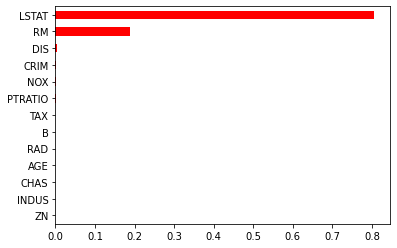

In [48]:
# crating horizonda plot
rfr_imp_f.plot(kind='barh', color = 'red')

### ADABOOST

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [4]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators= 100)

In [6]:
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=42),
                   n_estimators=100)

In [13]:
y_pred_prob = ada.predict_proba(x_test)[:,1]

In [14]:
y_test.shape

(171,)

In [15]:

acc_sc = roc_auc_score(y_test, y_pred_prob)

In [16]:
acc_sc

0.9936801881246325

### GradientBoosting

In [5]:
# regression 
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = boston.data
y = boston.target

In [4]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [6]:
gbt = GradientBoostingRegressor(n_estimators=300, random_state=42, max_depth=1)

In [7]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=42)

In [8]:
y_pred = gbt.predict(x_test)

In [9]:
rmse = MSE(y_test, y_pred) **(1/2)

In [10]:
rmse

3.568940403863883

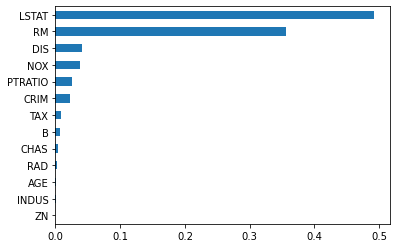

In [12]:
# less than that of random forest
# plotting the feature importance
import pandas as pd
import matplotlib.pyplot as plt
gbt_imp_f = pd.Series(gbt.feature_importances_, index = boston.feature_names).sort_values()
gbt_imp_f.plot(kind = 'barh')